| Problem | Formula|Search Domain|
|---      |----    |----|
|ZDT1|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g} \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT2|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-(f1/g)^2 \\\end{cases}} \text{  where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT3|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g}-(f_1/g)sin(10\pi f_1) \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|VU1|${\text{Min}}={\begin{cases}f_{1}\left(x_1, x_2\right)=\frac{1}{x^2_1+x^2_2+1}\\f_{2}\left(x_1, x_2\right)={x^2_1+3x^2_2+1}\end{cases}}$|$-3\leq{x_1,x_2}\leq3$ |
|VU2|${\text{Min}}={\begin{cases}f_{1}\left(x_1, x_2\right)=x_1+x_2+1\\f_{2}\left(x_1, x_2\right)={x^2_1+2x^2_2-1}\end{cases}}$|$-3\leq{x_1,x_2}\leq3$ |
|Kur1|${\text{Min}}={\begin{cases}f_{1}\left(x_1,x_2,....,x_n\right)=\sum_{i=1}^{n-1}-10exp^{-0.2\sqrt{x^2_{i}+x^2_{i+1}}}\\f_{2}\left(x_1,x_2,....,x_n\right)=\sum^{n}_{i=1}\|x_i\|^{0.8}+5sinx_i^3\\\end{cases}}$|$-5.05\leq{x_i}\leq{5}, i=1..n$|
|TKLY1|${\text{Min}}={\begin{cases}f_{1}\left(x_1\right)=x_1+0.1\\f_{2}\left(x_1,x_2,x_3,x_4\right)={\frac{1}{x_1+0.1}\Pi_{i=2}^{4}[2.0-exp(-(\frac{x_i-0.1}{0.004})^2)-0.8exp(-(\frac{x_i-0.9}{0.4})^2)]}\end{cases}}$|$0\leq{x_1,x_2,x_3,x_4}\leq1$ |
|LTDZ1 |${\text{Maximum}}={\begin{cases}f_{1}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)cos(x_2\pi/2)\\f_{2}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)sin(x_2\pi/2)\\f_{3}\left(x_1,x_3\right)=3-(1+x_3)sin(x_1\pi/2)\end{cases}}$|$0\leq{x_1,x_2,x_3}\leq1$|
|SK2 |${\text{Maximum}}={\begin{cases}f_{1}\left(x\right)=-(x_1-2)^2-(x_2+3)^2-(x_3-5)^2-(x_4-4)^2+5\\f_{2}\left(x\right)={\frac{sinx_1+sinx_2+sinx_3+sinx_4}{1+(x_1^2+x_2^2+x_3^2+x_4^2)/100}}\end{cases}}$|$-10\leq{x_i}\leq{10}, i=1..4$|
|SK2_typo|${\text{Maximum}}={\begin{cases}f_{1}\left(x\right)=-(x_1-2)^2-(x_2-3)^2-(x_3-5)^2-(x_4-4)^2+5\\f_{2}\left(x\right)={\frac{sinx_1+sinx_2+sinx_3+sinx_4}{1+(x_1^2+x_2^2+x_3^2+x_4^2)/100}}\end{cases}}$|$-10\leq{x_i}\leq{10}, i=1..4$|



# Kur1

In [ ]:
import time 
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator

ref_point = None
def calculate_hv(result):
    path = result['solution_path']
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    start_time = time.time()
    hv = metric.do(F)
    exc_time = time.time() - start_time
    return [hv,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    output_result = final_result[['Problem', 'Alg_name', 'Iteration', 'Objectives', 'n_variables',
    'exec_time','solutions','ref_point', 'hv',
    'hv_exc_time',  
    'lower_bound', 'upper_bound','solution_path']]
    return output_result

def nadir_deal_point(result):
    path = result['solution_path']
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    return [approx_ideal,approx_nadir]
def nadir_deal_point_result(result):
    get = result.apply(nadir_deal_point, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['approx_ideal','approx_nadir'])
    final_result = pd.concat([result, df],axis=1)
    return final_result

def igd(result):
    path = result['solution_path']
    F = np.loadtxt(path)
    igd_plus = get_performance_indicator("igd+", pf)
    igd_value = igd_plus.do(F)
    return igd_value

In [14]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
pd.set_option('display.max_rows', None)
result = pd.read_csv('/Users/wuyoscar/Documents/Project/MOOP/Result/Kur1_result')
result.loc[:,'path'] = result['path'].str[29:].values
result = result.drop(columns=['xl','xu'])
kur1_2 = result.loc[result['n_variables']==2].reset_index(drop=True)
kur1_3 = result.loc[result['n_variables']==3].reset_index(drop=True)
kur1_4 = result.loc[result['n_variables']==4].reset_index(drop=True)
kur1_5 = result.loc[result['n_variables']==5].reset_index(drop=True)


# Kur1 with two variables

In [15]:
kur1_2

,Problem,Alg_name,Iteration,Objectives,n_variables,exec_time,solutions_shape,path
0,KUR1,NSGA2,100,2,2,0.718960,100,KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-100_Obj-2...
1,KUR1,NSGA2,100,2,2,1.224637,200,KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-100_Obj-2...
2,KUR1,NSGA2,100,2,2,1.815870,300,KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-100_Obj-2...
3,KUR1,NSGA2,200,2,2,1.200013,100,KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-200_Obj-2...
4,KUR1,NSGA2,100,2,2,3.653600,500,KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-100_Obj-2...
5,KUR1,NSGA2,200,2,2,2.549558,200,KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-200_Obj-2...
6,KUR1,NSGA2,500,2,2,2.954606,100,KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-500_Obj-2...
7,KUR1,NSGA2,200,2,2,3.751209,300,KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-200_Obj-2...
8,KUR1,NSGA3,100,2,2,0.740098,113,KUR1/NSGA3_KUR1/KUR1_NSGA3_Iteration-100_Obj-2...
9,KUR1,NSGA2,1000,2,2,5.841308,100,KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-1000_Obj-...


In [41]:
for i in range(len(kur1_2)):
    path = kur1_2['path'][i]
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    print(path)
    #plt.figure(figsize=(10, 6))
    #plt.text(approx_ideal[0], approx_ideal[1], str(np.round(approx_ideal,2)))
    #plt.text(approx_nadir[0], approx_nadir[1], str(np.round(approx_nadir,2)))
    #plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
    #plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
    #plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
    #plt.title(f"{kur1_2['Problem'][i]}; {kur1_2['Alg_name'][i]}; Iter:{kur1_2['Iteration'][i]}; #obj:{kur1_2['Objectives'][i]}; #var:{kur1_2['n_variables'][i]}, #solutions_shape{kur1_2['solutions_shape'][i]}")
    #plt.legend()
    #plt.show()


KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-100_Obj-2_Var-2.2021_10_31-12:59:22_AM
KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-100_Obj-2_Var-2.2021_10_31-12:59:22_AM
KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-100_Obj-2_Var-2.2021_10_31-12:59:23_AM
KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-200_Obj-2_Var-2.2021_10_31-12:59:24_AM
KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-100_Obj-2_Var-2.2021_10_31-12:59:27_AM
KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-200_Obj-2_Var-2.2021_10_31-12:59:45_AM
KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-500_Obj-2_Var-2.2021_10_31-12:59:46_AM
KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-200_Obj-2_Var-2.2021_10_31-12:59:47_AM
KUR1/NSGA3_KUR1/KUR1_NSGA3_Iteration-100_Obj-2_Var-2.2021_10_31-12:59:48_AM
KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-1000_Obj-2_Var-2.2021_10_31-12:59:49_AM
KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-500_Obj-2_Var-2.2021_10_31-12:59:49_AM
KUR1/NSGA3_KUR1/KUR1_NSGA3_Iteration-100_Obj-2_Var-2.2021_10_31-12:59:49_AM
KUR1/NSGA2_KUR1/KUR1_NSGA2_Iteration-200_Obj-2_Var-2.2021_10_31-12:59:51_AM
KUR1/NSGA3_

In [ ]:
sorted_result.loc[:,'solution_path'] = sorted_result['path'].str[29:].values
print(f'total jobs : {sorted_result.shape[0]}')
print(f'test probelms{sorted_result.Problem.unique()}')
sorted_result = sorted_result.drop(columns=['path'])
# split dataframe using gropuby
splits = list(sorted_result.groupby("Problem"))
print(f'total test problems {len(splits)}')

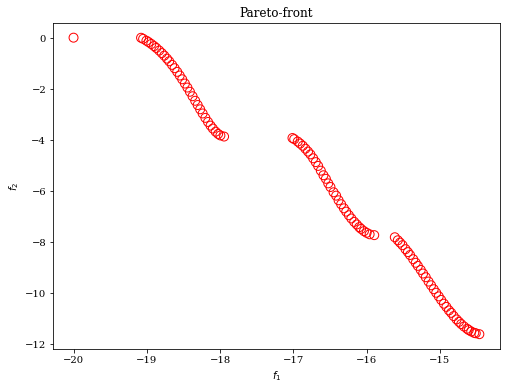

In [19]:
from pymoo.factory import get_problem
from pymoo.visualization.scatter import Scatter

pf = get_problem("kursawe").pareto_front()

sc = Scatter(title="Pareto-front")
sc.add(pf, s=80, facecolors='none', edgecolors='r')

sc.show()

In [20]:
from pymoo.core.problem import Problem
import numpy as np 
class Kur1(Problem):
    def __init__(self,n_var= None,**kwargs):
        super().__init__(n_obj=2, n_var=n_var, xl=-5.05, xu = 5,type_var= np.double, n_constr=0,**kwargs)

        
    def _evaluate(self,x, out, *args, **kwargs):
        #for i in range self.var-1
        power = np.column_stack([(-0.2)*np.sqrt(np.power(x[:,i],2)+np.power(x[:,i+1],2)) for i in range(self.n_var-1)])
        f1 = np.sum(-10*np.exp(power),axis=1)
        f2 = np.sum(np.power(abs(x),0.8) +5*np.sin(np.power(x,3)),axis=1)
        #exporting objective value     
        out['F'] = np.column_stack([f1,f2])

In [21]:
kursawe = get_problem("kursawe")
kur1_mine = Kur1(n_var=3)



[-5.05 -5.05 -5.05]


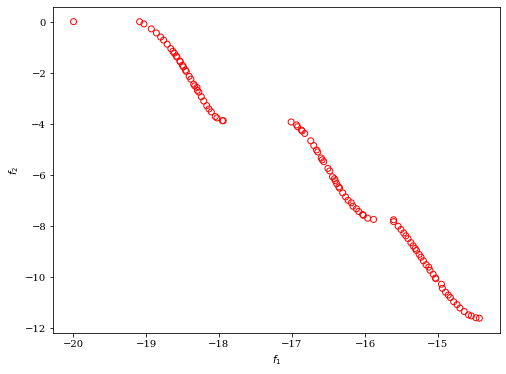

In [44]:
from pymoo.optimize import minimize
from pymoo.algorithms.moo.nsga2 import NSGA2
kur1_mine

algorithm = NSGA2(pop_size=100)

res = minimize(kur1_mine,
            algorithm,
            ('n_gen', 200),
            seed=1,
            verbose=False)

plot = Scatter()

plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()
print(kur1_mine.xl)

